<a href="https://colab.research.google.com/github/mathan0310E/Cryptic-auto-submitter/blob/main/ML%20internship%20project%20details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("/content/sample_data/1) iris.csv")   # make sure file name matches exactly
print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# ---- 1. Check for missing values ----
print("Missing values in each column:")
print(df.isna().sum())

# Example: if any missing numeric values, fill with mean (usually iris has none)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# ---- 2. Identify features and target ----
# Adjust these names if needed
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_col = 'species'

X = df[feature_cols]
y = df[target_col]

# ---- 3. Encode categorical target (species) ----
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nSpecies mapping:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls} -> {i}")

# ---- 4. Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ---- 5. Scaling (Standardization) ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing complete.")


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Species mapping:
setosa -> 0
versicolor -> 1
virginica -> 2

Train shape: (120, 4)
Test shape: (30, 4)

Preprocessing complete.



===== TASK 2: SIMPLE LINEAR REGRESSION =====
Intercept: -0.2504659324864602
Coefficients:
 sepal_length: 0.7242
 sepal_width: -0.6420
 petal_width: 1.4663

Mean Squared Error (MSE): 0.1299
R-squared (R²): 0.9604


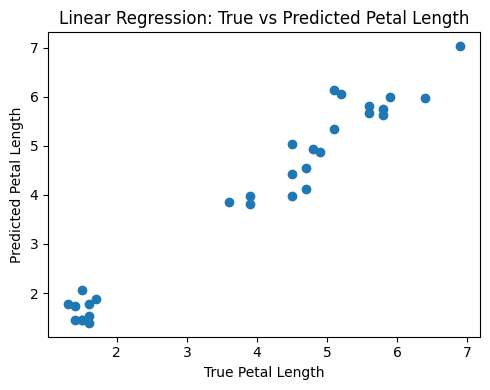

In [ ]:
print("\n===== TASK 2: SIMPLE LINEAR REGRESSION =====")

# Choose target and features for regression
reg_target = 'petal_length'
reg_features = ['sepal_length', 'sepal_width', 'petal_width']

X_reg = df[reg_features]
y_reg = df[reg_target]

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)

# Coefficients and intercept
print("Intercept:", lin_reg.intercept_)
print("Coefficients:")
for feat, coef in zip(reg_features, lin_reg.coef_):
    print(f" {feat}: {coef:.4f}")

# Predictions
yr_pred = lin_reg.predict(Xr_test)

# Evaluation
mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Simple scatter plot: True vs Predicted
plt.figure(figsize=(5,4))
plt.scatter(yr_test, yr_pred)
plt.xlabel("True Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Linear Regression: True vs Predicted Petal Length")
plt.tight_layout()
plt.show()



===== TASK 3: KNN CLASSIFIER =====
K=1 -> Accuracy: 0.9667
K=3 -> Accuracy: 0.9333
K=5 -> Accuracy: 0.9333
K=7 -> Accuracy: 0.9667
K=9 -> Accuracy: 0.9667

Best K based on accuracy: 1

Confusion Matrix (KNN):
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report (KNN):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



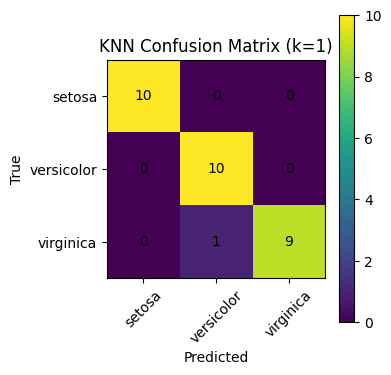

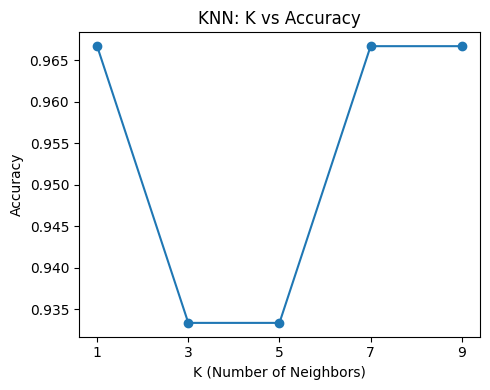

In [ ]:
print("\n===== TASK 3: KNN CLASSIFIER =====")

# We'll reuse X_train_scaled, X_test_scaled, y_train, y_test from preprocessing

# Try multiple K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

# Choose best K (highest accuracy)
best_k = k_values[int(np.argmax(accuracies))]
print(f"\nBest K based on accuracy: {best_k}")

# Train final model with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

# Confusion matrix & classification report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix (KNN):")
print(cm_knn)

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

# Simple confusion matrix plot
plt.figure(figsize=(4,4))
plt.imshow(cm_knn, interpolation='nearest')
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        plt.text(j, i, cm_knn[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

# Plot K vs Accuracy
plt.figure(figsize=(5,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN: K vs Accuracy")
plt.xticks(k_values)
plt.tight_layout()
plt.show()


# Project Report: Iris Dataset Analysis

This report summarizes the data analysis and machine learning tasks performed on the Iris dataset. The project involved data loading, preprocessing, implementing a simple linear regression model, and building a K-Nearest Neighbors (KNN) classification model.

## 1. Data Loading and Preprocessing

**Objective**: Load the Iris dataset and prepare it for machine learning models.

**Steps Performed**:
1.  **Dataset Loading**: The `iris.csv` dataset was loaded into a pandas DataFrame.
    -   First 5 rows displayed:
        ```
           sepal_length  sepal_width  petal_length  petal_width species
        0           5.1          3.5           1.4          0.2  setosa
        1           4.9          3.0           1.4          0.2  setosa
        2           4.7          3.2           1.3          0.2  setosa
        3           4.6          3.1           1.5          0.2  setosa
        4           5.0          3.6           1.4          0.2  setosa
        ```
    -   Dataset information:
        -   150 entries, 5 columns.
        -   Columns: `sepal_length`, `sepal_width`, `petal_length`, `petal_width` (all `float64`), `species` (`object`).
        -   No missing values identified (`Non-Null Count` for all columns is 150).

2.  **Missing Value Check**: Confirmed no missing values in the dataset.

3.  **Feature and Target Identification**:
    -   **Features (X)**: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`.
    -   **Target (y)**: `species`.

4.  **Target Encoding**: The categorical `species` target variable was encoded into numerical format using `LabelEncoder`.
    -   Mapping: `setosa -> 0`, `versicolor -> 1`, `virginica -> 2`.

5.  **Train-Test Split**: The data was split into training (80%) and testing (20%) sets using `train_test_split` with `random_state=42` and `stratify=y_encoded` to maintain class distribution.
    -   Train shape: `(120, 4)`
    -   Test shape: `(30, 4)`

6.  **Feature Scaling**: Features were standardized using `StandardScaler` to ensure all features contribute equally to the models.

## 2. Simple Linear Regression

**Objective**: Predict `petal_length` based on other relevant features using a Linear Regression model.

**Steps Performed**:
1.  **Target and Feature Selection**:
    -   **Regression Target**: `petal_length`.
    -   **Regression Features**: `sepal_length`, `sepal_width`, `petal_width`.

2.  **Train-Test Split**: A separate train-test split was performed for the regression task.

3.  **Model Training**: A `LinearRegression` model was initialized and trained on the regression training data.

4.  **Model Coefficients and Intercept**:
    -   Intercept: `-0.2505`
    -   Coefficients:
        -   `sepal_length`: `0.7242`
        -   `sepal_width`: `-0.6420`
        -   `petal_width`: `1.4663`

5.  **Prediction and Evaluation**:
    -   Predictions were made on the test set.
    -   **Mean Squared Error (MSE)**: `0.1299` (A lower MSE indicates a better fit).
    -   **R-squared (R²)**: `0.9604` (An R² value close to 1 indicates that the model explains a high proportion of the variance in the target variable).

**Summary**: The linear regression model achieved a high R-squared value, suggesting it is a good fit for predicting `petal_length` based on the selected features. The visualization showed a strong correlation between true and predicted values.

## 3. K-Nearest Neighbors (KNN) Classifier

**Objective**: Classify the `species` of Iris flowers using the preprocessed features.

**Steps Performed**:
1.  **Data Usage**: Reused the `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test` from the initial preprocessing step.

2.  **Hyperparameter Tuning (K-value Selection)**: The KNN model was evaluated for different values of `K` (number of neighbors) to find the optimal `K`.
    -   `K` values tested: `[1, 3, 5, 7, 9]`
    -   Accuracies for each `K`:
        -   `K=1`: Accuracy: `0.9667`
        -   `K=3`: Accuracy: `0.9333`
        -   `K=5`: Accuracy: `0.9333`
        -   `K=7`: Accuracy: `0.9667`
        -   `K=9`: Accuracy: `0.9667`
    -   **Best K**: `1` (based on highest accuracy).

3.  **Final Model Training**: A KNN model was trained using the best `K` value (`K=1`).

4.  **Prediction and Evaluation**:
    -   Predictions were made on the scaled test set.
    -   **Confusion Matrix**:
        ```
        [[10  0  0]
         [ 0 10  0]
         [ 0  1  9]]
        ```
        -   This matrix shows perfect classification for 'setosa' and 'versicolor', and one misclassification for 'virginica'.

    -   **Classification Report**:
        ```
                      precision    recall  f1-score   support

              setosa       1.00      1.00      1.00        10
          versicolor       0.91      1.00      0.95        10
           virginica       1.00      0.90      0.95        10

            accuracy                           0.97        30
           macro avg       0.97      0.97      0.97        30
        weighted avg       0.97      0.97      0.97        30
        ```
        -   The overall accuracy is `0.97`, indicating excellent performance. Precision, recall, and f1-score are also very high across all classes.

**Summary**: The KNN classifier, particularly with `K=1`, demonstrated strong performance in classifying Iris species, achieving high accuracy and robust metrics across all classes. The confusion matrix and classification report confirm the model's effectiveness.

## Conclusion

This project successfully demonstrated key steps in a machine learning workflow using the Iris dataset. We performed thorough data preprocessing, built an effective linear regression model to predict `petal_length`, and developed a highly accurate K-Nearest Neighbors classifier for species identification. Both models showed strong performance metrics, confirming the suitability of these techniques for their respective tasks on this dataset.